In [2]:
# importar as bibliotecas necessárias
import numpy as np # arrays
import matplotlib.pyplot as plt # plots
from scipy import signal
plt.rcParams.update({'font.size': 14})
np.seterr(all="ignore");

### Seja um sinal contínuo e seu espectro contínuo

\begin{equation}
x(t) = \mathrm{e}^{-at}u(t), a>0
\end{equation}
neste caso 

\begin{equation}
X(\mathrm{j} \omega)=\frac{1}{a+\mathrm{j}\omega}
\end{equation}

In [23]:
a = 50
delta_f = 0.1
f_minmax = 2000
# Freq domain
freq = np.around(np.arange(-f_minmax/2, f_minmax/2 + delta_f, delta_f),2)
w = 2*np.pi*freq
Xjw = 1/(a+1j*w)

# Apply some hard filtering

This is not what is tipically done. Instead we will use a real filter, that is called the anti-aliasing filter

In [24]:
f_band = 500
id_spk = np.where((freq >= f_band) | (freq <= -f_band))
Xjw[id_spk] = 0

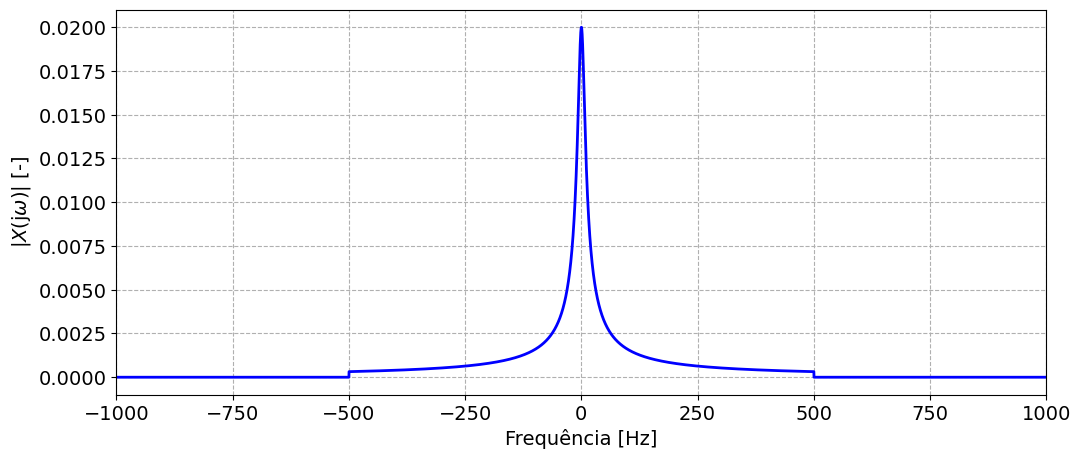

In [25]:
plt.figure(figsize=(12, 5))
plt.plot(freq, np.abs(Xjw), '-b', linewidth = 2) #/np.amax(np.abs(Xjw))
plt.grid(linestyle = '--', which='both')
plt.xlabel('Frequência [Hz]')
plt.ylabel(r'$|X(\mathrm{j}\omega)|$ [-]')
plt.xlim((-1000, 1000));

### Seja o trem de impulsos e seu espectro contínuo

\begin{equation}
q(t) = \sum\limits_{n = -\infty}^{\infty}\delta(t-nT_s)
\end{equation}
neste caso 

\begin{equation}
Q(\mathrm{j} \omega)=\frac{2\pi}{T_s}\sum\limits_{k = -\infty}^{\infty}\delta(\omega-k\omega_s)
\end{equation}
com $\omega_s = 2\pi/T_s$

In [30]:
Ts = 1/1100
fs = 1/Ts
ws = 2*np.pi*fs
print("Sampling rate: {} [samples/s]".format(fs))

Sampling rate: 1100.0 [samples/s]


C:\Users\Cliente\AppData\Local\Temp\ipykernel_20152\844314209.py:9: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(freq, Qjw, '-k', basefmt=" ", use_line_collection=  True)


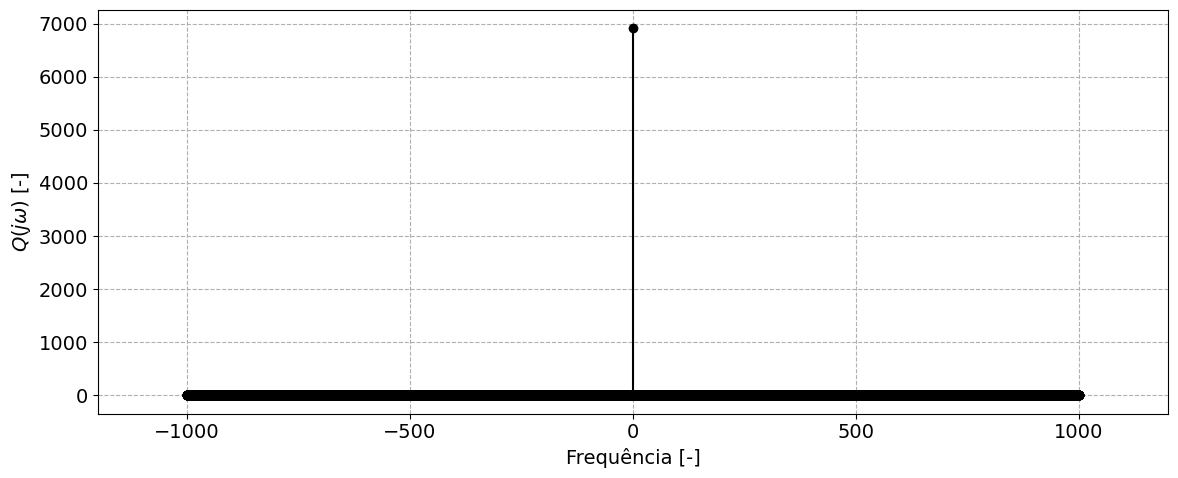

In [31]:
fs_span = np.arange(-120,121)*fs
id_span = np.where((fs_span <= freq[-1]) & (fs_span >= freq[0]))[0]

id_vec = np.searchsorted(freq, fs_span[id_span])

Qjw = (2*np.pi/Ts)*signal.unit_impulse(len(freq), id_vec)

plt.figure(figsize = (12,5))
plt.stem(freq, Qjw, '-k', basefmt=" ", use_line_collection=  True)
#plt.plot(freq_vec, np.abs(ck)/len(ck), '-k')
plt.grid(linestyle = '--', which='both')
plt.xlabel('Frequência [-]')
plt.ylabel(r'$Q(j \omega)$ [-]')
plt.xlim((1.2*freq[0], 1.2*freq[-1]));
plt.tight_layout()
plt.show()

# Compute spectral convolution and plot the resulting spk

In [32]:
Xjw_m = np.convolve(Xjw, Qjw/fs)/(2*np.pi)
freq_m = np.linspace(freq[0], freq[-1], len(Xjw_m))
# a few tricks to get it right (since we are on discrete mode on the computer)
Xjw_m2 = Xjw_m[int(len(freq_m)/4):int(3*len(freq_m)/4)]
freq_m2 = np.linspace(freq[0], freq[-1], len(Xjw_m2))

Text(0, 0.5, '$|X(\\mathrm{j}\\omega)|$ [-]')

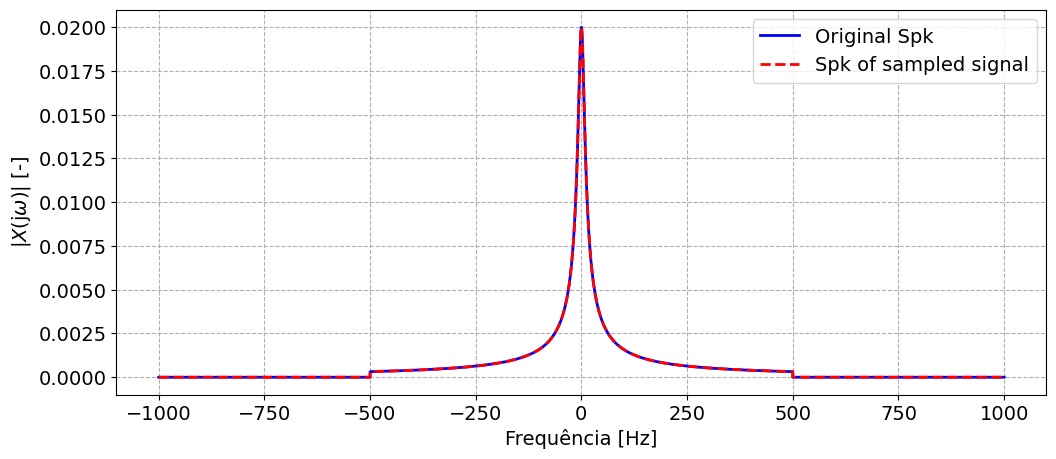

In [33]:
plt.figure(figsize=(12, 5))
plt.plot(freq, np.abs(Xjw), '-b', linewidth = 2, label = 'Original Spk')
plt.plot(freq_m2, np.abs(Xjw_m2), '--r', linewidth = 2, label = 'Spk of sampled signal') #/np.amax(np.abs(Xjw))
#plt.plot(freq_m, np.abs(Xjw_m), '--k', linewidth = 2, label = 'Spk of sampled signal') #/np.amax(np.abs(Xjw))
plt.legend(loc = 'upper right')
plt.grid(linestyle = '--', which='both')
plt.xlabel('Frequência [Hz]')
plt.ylabel(r'$|X(\mathrm{j}\omega)|$ [-]')
#plt.xlim(-100, 100);

### Seja um sinal contínuo e seu espectro contínuo

\begin{equation}
x(t) = \mathrm{e}^{-at}u(t), a>0
\end{equation}
neste caso 

\begin{equation}
X(\mathrm{j} \omega)=\frac{1}{a+\mathrm{j}\omega}
\end{equation}

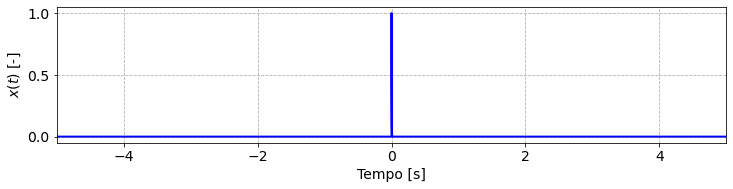

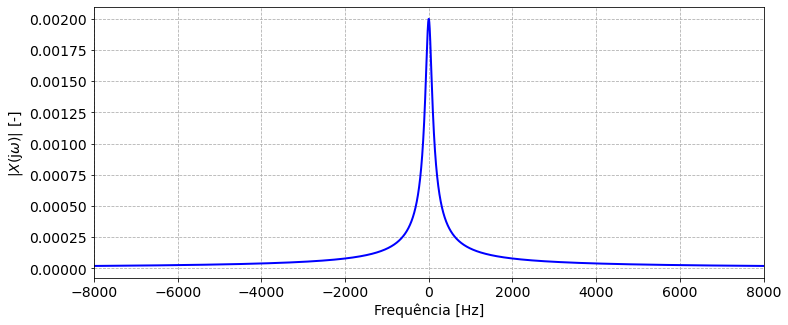

In [4]:
fs = 4000
Ts = 1/fs

time = np.arange(-5, 5+Ts, Ts)
xt = np.zeros(len(time))
a = 500
xt[time>=0] = np.exp(-a*time[time>=0])

# Time domain
plt.figure(figsize=(12, 2.5))
plt.plot(time, xt, '-b', linewidth = 2)
plt.grid(linestyle = '--', which='both')
plt.xlabel('Tempo [s]')
plt.ylabel(r'$x(t)$ [-]')
plt.xlim((time[0], time[-1]));

# Freq domain
delta_f = 0.01
f_minmax = 4*fs
freq = np.around(np.arange(-f_minmax/2, f_minmax/2 + delta_f, delta_f),2)
w = 2*np.pi*freq

Xjw = 1/(a+1j*w)

plt.figure(figsize=(12, 5))
plt.plot(freq, np.abs(Xjw), '-b', linewidth = 2)
plt.grid(linestyle = '--', which='both')
plt.xlabel('Frequência [Hz]')
plt.ylabel(r'$|X(\mathrm{j}\omega)|$ [-]')
plt.xlim((freq[0], freq[-1]));

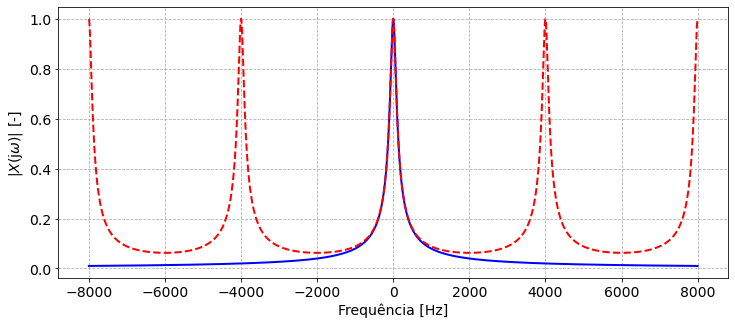

In [5]:
Xjw_m1 = np.fft.fft(xt)/len(xt)
#freq_m1 = np.fft.fftshift(np.fft.fftfreq(len(xt), d=Ts))
freq_m1 = np.linspace(0, (len(xt)-1)*fs/len(xt), len(xt))

Xjw_m = np.tile(Xjw_m1, 4)
freq_m = np.linspace(-2*fs, 2*fs, len(Xjw_m))


plt.figure(figsize=(12, 5))
plt.plot(freq, np.abs(Xjw)/np.amax(np.abs(Xjw)), '-b', linewidth = 2)
#plt.plot(freq_m1, np.abs(Xjw_m1)/np.amax(np.abs(Xjw_m1)), '--k', linewidth = 2)
plt.plot(freq_m, np.abs(Xjw_m)/np.amax(np.abs(Xjw_m)), '--r', linewidth = 2)
plt.grid(linestyle = '--', which='both')
plt.xlabel('Frequência [Hz]')
plt.ylabel(r'$|X(\mathrm{j}\omega)|$ [-]');